<div style="text-align: center;">
    <a href="https://www.dataia.eu/">
        <img border="0" src="https://github.com/ramp-kits/template-kit/raw/main/img/DATAIA-h.png" width="90%"></a>
</div>

# RAMP starting kit on Credit Card Fraud Detection

## Introduction

Being able to detect fraudulent transactions is of utmost importance for any credit card company in order to protect their customers from theft but also to protect themselves from financial losses.

In this challenge, we will use a dataset of credit card transactions to predict whether a transaction is fraudulent or not. The dataset is anonymized and contains a mixture of numerical and categorical features. The goal is to design an algorithm that can accurately predict whether a transaction is fraudulent or not.
 
A well-designed machine learning model for fraud detection helps financial institutions minimize financial losses, reduce chargebacks, and enhance customer trust. By improving fraud detection accuracy, banks can better protect customers while avoiding unnecessary transaction declines that may frustrate legitimate users.  

Overall, fraud detection in highly imbalanced datasets requires careful model design, appropriate evaluation metrics, and advanced techniques to ensure that rare fraudulent transactions are identified effectively without overwhelming customers with false alarms.

Authors: Abdoul R. Zeba, Richard Pholvichith, Thibaut Boyenval

_Data Source: The dataset was collected from credit card transactions made by European cardholders in 2023, with sensitive information removed to ensure privacy and compliance with ethical guidelines._
https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023

# Exploratory data analysis

The goal of this section is to show what's in the data, and how to play with it. This dataset contains credit card transactions from European customers recorded over a two-day period in September 2013.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Load the data

import problem
X_df, y = problem.get_train_data()

In [2]:
X_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,2039.0,-0.642456,0.360573,1.191212,0.364345,0.946524,-0.266670,0.072068,0.231482,-0.764055,-0.329583,1.371838,0.476537,-0.062092,-0.045046,0.812419,0.101979,0.168247,0.166662,0.666092,0.171948,-0.057728,-0.337859,0.134496,-0.352322,-0.776601,0.121268,0.128574,0.168394,1.98
1,128469.0,-4.625318,2.680891,-3.860725,-0.243782,5.053306,-3.675196,-10.991594,-9.027947,-0.463113,-0.093950,-0.730080,2.049611,-2.697788,4.087081,-1.699328,0.305471,0.854357,-0.150045,-0.825550,1.791502,-4.459764,1.640056,-9.073680,0.169149,-3.756198,0.358617,0.345690,0.520851,2.00
2,18064.0,-3.408448,4.634203,-8.986378,5.767694,-4.340056,-3.267062,-8.215842,2.652823,-3.323071,-11.028734,9.659773,-14.919028,0.003169,-13.377658,-0.479967,-9.981433,-16.668179,-5.133154,2.042806,1.348395,1.499485,-0.277509,0.013462,-0.020885,-0.057518,-0.303920,2.096459,0.670476,89.99
3,148995.0,-1.039334,0.879851,0.085864,-0.521489,0.518712,-1.219917,0.768267,-0.122142,-0.253980,-0.076033,-1.036551,-0.315142,-0.093477,0.409540,0.571800,-0.117210,-0.353307,-0.015290,0.217373,-0.016214,0.247968,0.834075,-0.451993,-0.019912,-0.086202,0.801137,-0.205003,-0.131257,12.36
4,54819.0,-0.540798,1.201504,1.559446,-0.139415,0.414941,-0.928362,1.304162,-0.727024,0.391291,0.736177,0.148231,-0.189036,0.308501,-1.249381,0.989244,0.083267,-0.337910,-0.285300,-0.138039,0.591961,-0.479835,-0.635204,-0.117783,0.330061,-0.127115,-0.004426,-0.028626,-0.441094,8.99


All features, except for 'Time' and 'Amount,' have been transformed using Principal Component Analysis (PCA) to protect sensitive information. As a result, the original variables and additional contextual details are not available. The features labeled V1 through V28 correspond to the principal components obtained through PCA. The 'Time' variable represents the elapsed time (in seconds) since the first recorded transaction, while 'Amount' indicates the transaction value, which can be useful for cost-sensitive learning approaches. The target variable, 'Class,' is binary, with 1 representing fraudulent transactions and 0 for legitimate ones.

In [3]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57059 entries, 0 to 57058
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57059 non-null  float64
 1   V1      57059 non-null  float64
 2   V2      57059 non-null  float64
 3   V3      57059 non-null  float64
 4   V4      57059 non-null  float64
 5   V5      57059 non-null  float64
 6   V6      57059 non-null  float64
 7   V7      57059 non-null  float64
 8   V8      57059 non-null  float64
 9   V9      57059 non-null  float64
 10  V10     57059 non-null  float64
 11  V11     57059 non-null  float64
 12  V12     57059 non-null  float64
 13  V13     57059 non-null  float64
 14  V14     57059 non-null  float64
 15  V15     57059 non-null  float64
 16  V16     57059 non-null  float64
 17  V17     57059 non-null  float64
 18  V18     57059 non-null  float64
 19  V19     57059 non-null  float64
 20  V20     57059 non-null  float64
 21  V21     57059 non-null  float64
 22

In [4]:
X_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000,57059.000000
mean,94615.765208,-0.017472,0.017506,-0.008193,0.011485,-0.009099,-0.001556,-0.005750,0.002038,-0.010978,-0.008115,0.008171,-0.016052,0.004476,-0.013551,-0.000682,-0.007048,-0.013498,-0.002258,0.002556,-0.002945,0.001794,-0.000794,0.000984,0.000249,0.000227,-0.000899,0.002581,0.001310,88.192705
std,47494.938043,2.004522,1.678872,1.587311,1.443118,1.395159,1.327408,1.288139,1.197738,1.113192,1.141436,1.041929,1.058799,0.998103,1.021355,0.914686,0.906425,0.952841,0.849896,0.817218,0.779873,0.728340,0.723336,0.648593,0.603647,0.525065,0.481045,0.405228,0.349679,250.387789
min,1.000000,-40.470142,-50.383269,-32.454198,-5.416315,-35.182120,-16.671588,-43.557242,-41.044261,-13.320155,-24.588262,-4.049895,-18.683715,-3.848943,-19.214325,-4.498945,-12.432279,-25.162799,-9.090892,-4.932733,-28.009635,-22.797604,-8.887017,-32.828995,-2.822684,-8.696627,-1.855355,-9.845808,-8.412267,0.000000
25%,54111.500000,-0.929001,-0.587036,-0.890247,-0.856455,-0.692088,-0.769674,-0.550726,-0.209056,-0.657917,-0.537662,-0.761303,-0.406692,-0.646236,-0.429052,-0.580826,-0.465670,-0.488796,-0.495990,-0.459532,-0.212739,-0.228975,-0.538108,-0.162097,-0.353651,-0.318353,-0.326870,-0.070350,-0.052789,5.480000
50%,84556.000000,0.002729,0.074836,0.183797,-0.012155,-0.054124,-0.279084,0.039404,0.021534,-0.054173,-0.093281,-0.034458,0.137080,-0.010416,0.048226,0.046774,0.063935,-0.068214,-0.006839,0.002794,-0.064345,-0.031317,0.006481,-0.012342,0.040312,0.016687,-0.052471,0.002863,0.011723,21.740000
75%,139297.000000,1.313235,0.811521,1.036430,0.751647,0.613884,0.394430,0.569180,0.326985,0.587651,0.454155,0.750166,0.614825,0.667088,0.490362,0.642435,0.521832,0.402201,0.505004,0.464575,0.132308,0.186050,0.525009,0.148199,0.437729,0.353944,0.239905,0.094648,0.079877,76.825000
max,172788.000000,2.422508,22.057729,4.226108,13.143668,24.345310,21.550496,36.877368,19.168327,10.348407,13.811758,12.018913,4.242791,4.569009,7.234249,5.685899,8.289890,9.253526,4.295648,4.801123,26.237391,27.202839,8.316275,22.528412,4.022866,7.519589,3.116200,10.135597,22.620072,12910.930000


Very unbalanced classes: Out of 57059 transactions, only 197 are classified as fraudulent, making fraud cases extremely rare at just 0.345% of the data.  

In [5]:
unique, counts = np.unique(y, return_counts=True)

for label, count in zip(unique, counts):
    print(f"Classe {label}: {count} samples")


Classe 0: 56862 samples
Classe 1: 197 samples


Due to the severe class imbalance, traditional accuracy metrics such as the confusion matrix may not provide meaningful insights. Instead, we evaluate performance using the Area Under the Precision-Recall Curve (AUPRC), which is more suitable for imbalanced datasets.

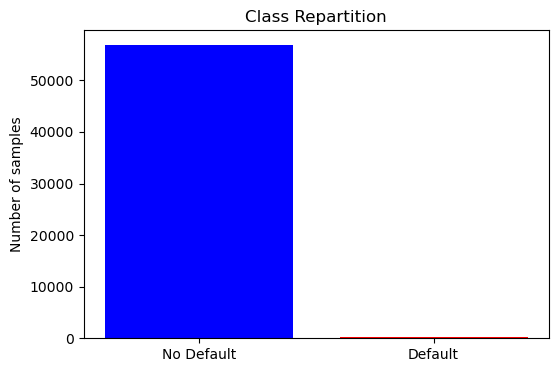

In [6]:
plt.figure(figsize=(6, 4))
plt.bar(unique, counts, color=['blue', 'red'])
plt.xticks(unique, labels=["No Default", "Default"])
plt.ylabel("Number of samples")
plt.title("Class Repartition")
plt.show()

## The static features

<span style="color:red">Red variables</span> are ids, labels, or other human-annotated features, so they should not be used as input in the classification. <span style="color:lightblue">Light blue variables</span> are legal but not likely to contribute information to the classification. <span style="color:black">Black</span> variables are definitely discriminative.

<ul>
    <li> <code><b><span style="color:red">Time</span></b></code>: Unique identifier for each transaction.
    <li> <code><b><span style="color:black">V1-V28</span></b></code>: Anonymized features representing various transaction attributes (e.g., time, location, etc.).
    <li> <code><b><span style="color:black">Amount</span></b></code>: The transaction amount.
    <li> <code><b>Class</b></code>: Binary label indicating whether the transaction is fraudulent (1) or not (0).
</ul> 

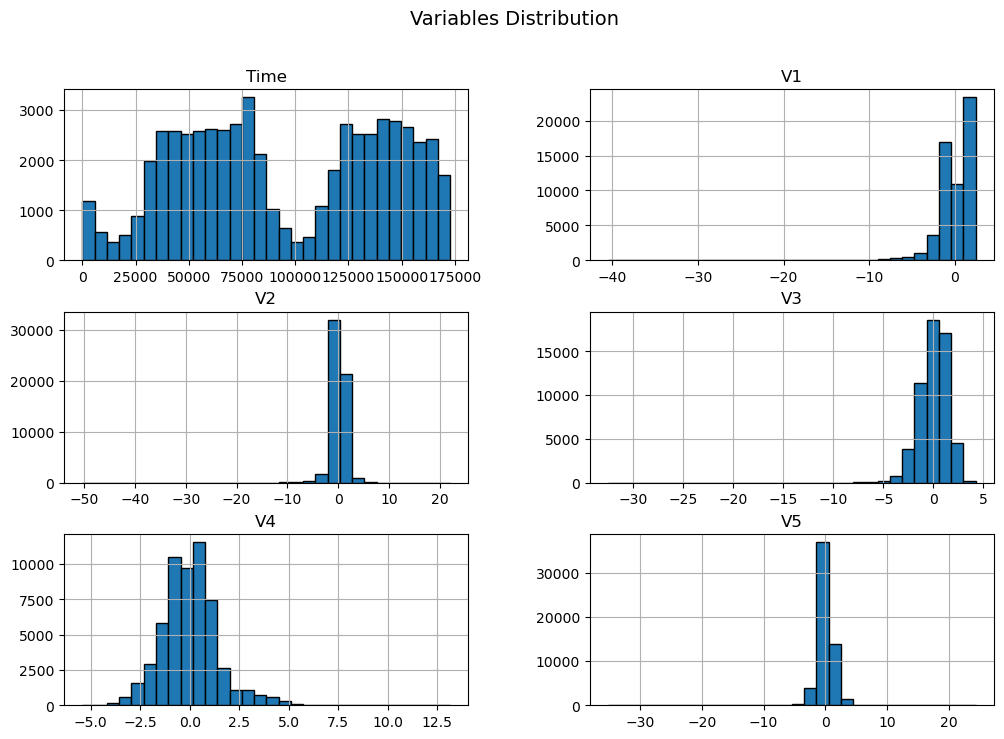

In [7]:
cols_to_plot = X_df.columns[:6]

X_df[cols_to_plot].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Variables Distribution", fontsize=14)
plt.show()


<Figure size 1200x600 with 0 Axes>

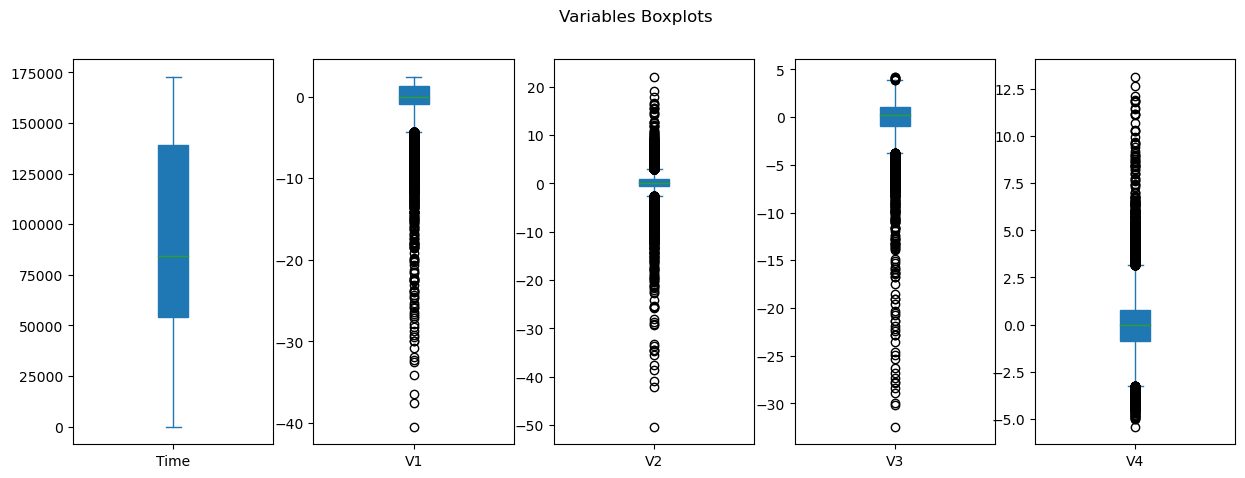

In [8]:
features = X_df.columns[:5]

plt.figure(figsize=(12, 6))
X_df[features].plot(kind='box', subplots=True, layout=(1, len(features)), figsize=(15, 5), patch_artist=True)
plt.suptitle("Variables Boxplots")
plt.show()


c:\Users\Public\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Public\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


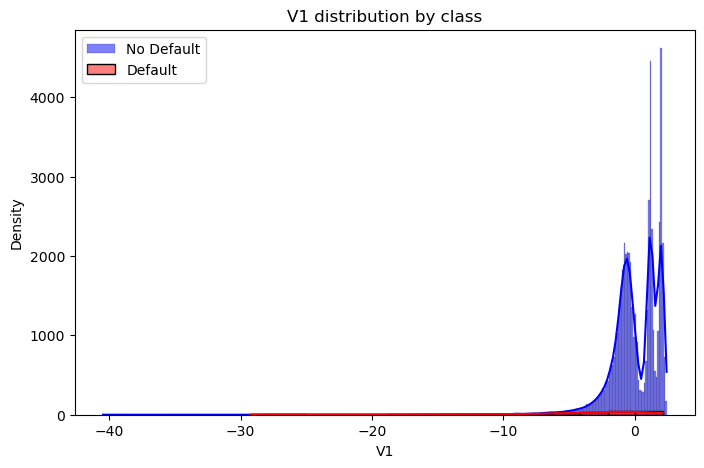

c:\Users\Public\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Public\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


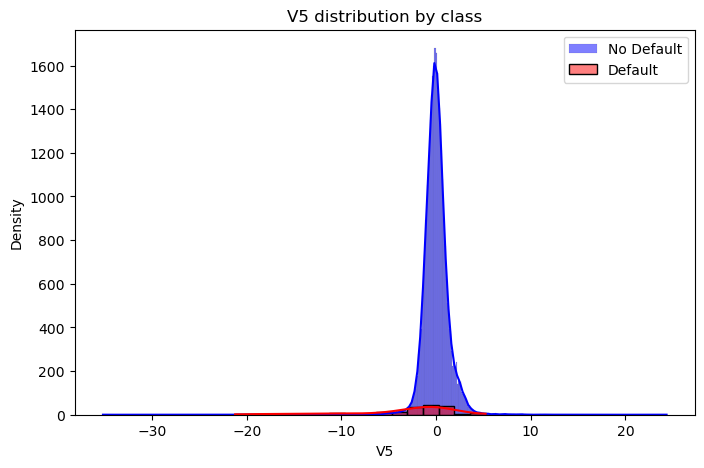

c:\Users\Public\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Public\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


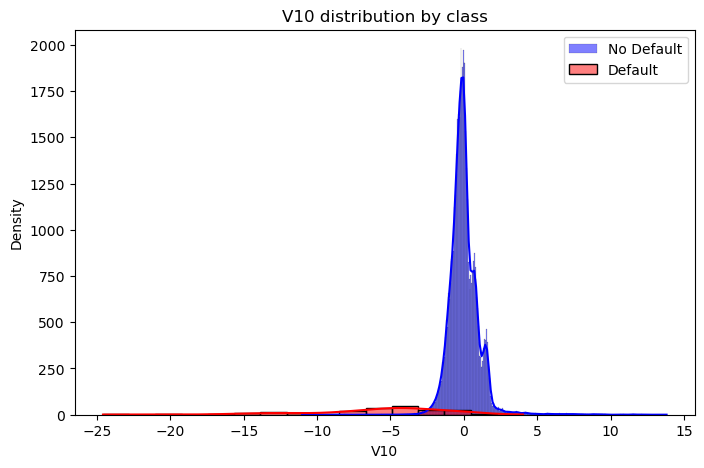

c:\Users\Public\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Public\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


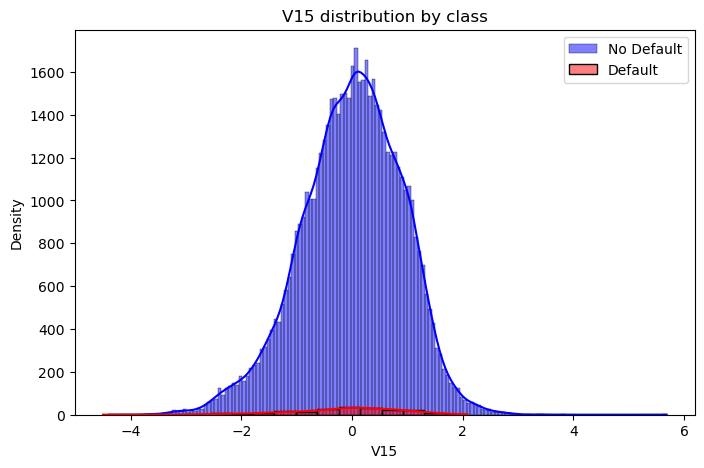

c:\Users\Public\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Public\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


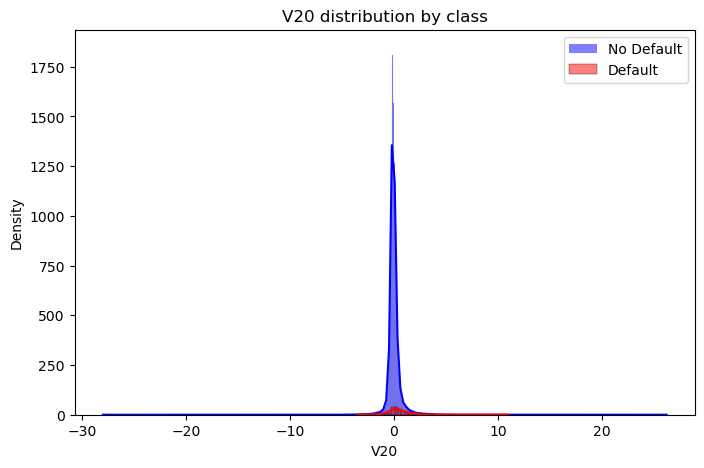

In [9]:
lf = [1, 5, 10, 15, 20]

for i in lf:
    feature_name = X_df.columns[i]

    plt.figure(figsize=(8, 5))
    sns.histplot(X_df[feature_name][y == 0], color="blue", label="No Default", kde=True)
    sns.histplot(X_df[feature_name][y == 1], color="red", label="Default", kde=True)
    plt.xlabel(feature_name)
    plt.ylabel("Density")
    plt.title(f"{feature_name} distribution by class")
    plt.legend()
    plt.show()

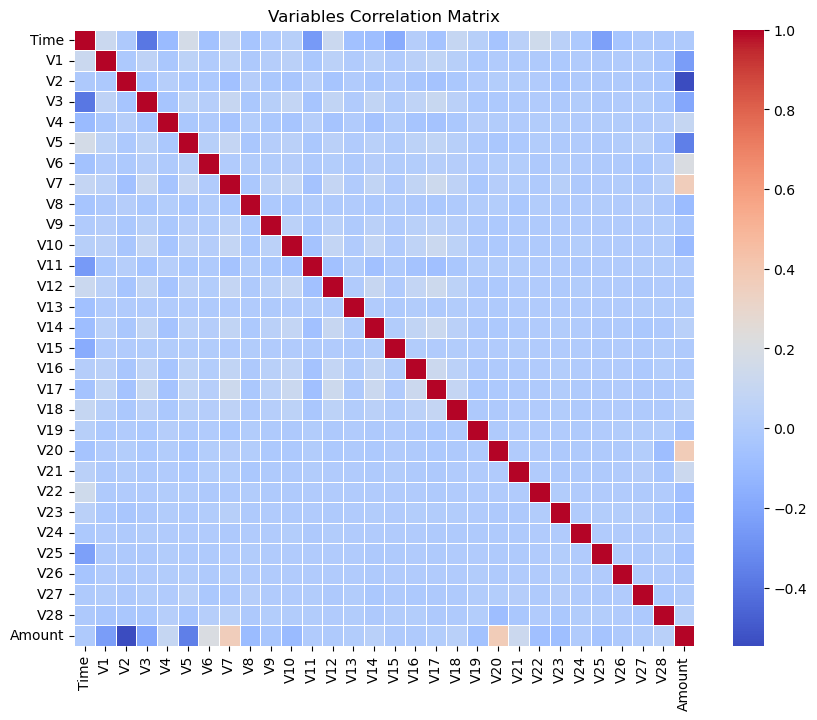

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_df.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Variables Correlation Matrix")
plt.show()

A lot of uncorrelated variables due to the PCA transformation of the original data.

# Challenge evaluation

Detecting credit card fraud using machine learning is a challenging but crucial task, especially due to the highly imbalanced nature of the data. In real-world transactions, fraudulent cases are extremely rare compared to legitimate ones. This imbalance creates several challenges that must be addressed to develop an effective fraud detection system.  

### **Key Challenges of Imbalanced Fraud Detection**  

1. **Biased Learning & Poor Generalization**  
   Since the vast majority of transactions are legitimate, a standard machine learning model trained on raw data may learn to simply predict every transaction as non-fraudulent to maximize overall accuracy. However, this would render the model useless, as fraud detection requires correctly identifying rare fraudulent cases rather than just achieving a high accuracy score.  

2. **Evaluation Metrics Are Misleading**  
   Traditional evaluation metrics such as accuracy or the confusion matrix can be deceptive in imbalanced datasets. For example, if a model predicts "non-fraud" for every transaction, it could still achieve over 99% accuracy while completely failing to detect fraud. Instead, metrics like the **Precision-Recall Curve (PR AUC)** or **F1-score** are more suitable for assessing the model’s true performance.  

3. **High Cost of False Negatives**  
   Missing a fraudulent transaction (false negative) can have severe financial consequences for banks and customers, including financial loss and reputational damage. Therefore, fraud detection models must prioritize recall (detecting as many fraud cases as possible) while minimizing false positives to avoid unnecessary disruptions for customers.  

4. **Handling Data Imbalance in Model Training**  
   To address the imbalance, several techniques are commonly used in fraud detection:  
   - **Resampling Methods**: Oversampling the minority class (fraud) or undersampling the majority class (legitimate transactions) can help balance the training data.  
   - **Anomaly Detection Approaches**: Since fraud cases are rare, they can be treated as anomalies using unsupervised or semi-supervised learning techniques.  
   - **Cost-Sensitive Learning**: Assigning higher penalties to misclassified fraud cases ensures the model focuses more on detecting them.  
   - **Ensemble Methods**: Combining multiple models can improve detection rates and reduce false positives.  


# Submission format

Here, you should describe the submission format. This is the format the participants should follow to submit their predictions on the RAMP plateform.

This section also show how to use the `ramp-workflow` library to test the submission locally.

## The pipeline workflow

The input data are stored in a dataframe. To go from a dataframe to a numpy array we will use a scikit-learn column transformer. The first example we will write will just consist in selecting a subset of columns we want to work with.

This pipeline is designed for credit card fraud detection using a Logistic Regression model, while handling the class imbalance and applying appropriate data preprocessing.

1. Preprocessing Steps
The dataset consists of features:

    - "Amount" (Transaction amount)
    - "V1" to "V28" (PCA-transformed features)
    - "Time" (elapsed time since the first transaction) → Removed

    To prepare the data for the model, we apply:

    - Logarithmic Transformation of "Amount":
    Transaction amounts vary significantly, and applying log(1 + x) helps reduce skewness and improve model stability.
    - Standardization (StandardScaler):
    Since "Amount" and "V1-V28" are on different scales, we standardize them for better convergence of the Logistic Regression model.
    - Automatic Removal of "Time":
    "Time" is not used in the model, and ColumnTransformer(remainder="drop") ensures it is ignored.

2. Logistic Regression with Class Balancing
The dataset is highly imbalanced, with fraud cases representing only ~0.345% of transactions.
To handle this:

    We set class_weight="balanced" in LogisticRegression, which automatically adjusts the class weights to give more importance to fraud cases.
    The model is trained using the LBFGS solver (solver="lbfgs") with 1000 iterations (max_iter=1000) to ensure convergence.

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
import numpy as np


def log_transform_amount(X):
    X = X.copy()
    X["Amount"] = np.log1p(X["Amount"])
    return X

def get_estimator():
    numeric_features = ["Amount"]
    pca_features = [f"V{i}" for i in range(1, 29)]

    preprocessor = ColumnTransformer([
        ("log_transform", FunctionTransformer(log_transform_amount, validate=False), numeric_features),
        ("scaler", StandardScaler(), numeric_features + pca_features)
    ], remainder="drop")

    pipe = make_pipeline(
        preprocessor,
        LogisticRegression(class_weight="balanced", max_iter=1000, solver="lbfgs")
    )

    return pipe


## Testing using a scikit-learn pipeline

In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(get_estimator(), X_df, y, cv=5, scoring='roc_auc')
print(scores)

[0.94925453 0.98652905 0.96745735 0.97822942 0.9310858 ]


## Submission

To submit your code, you can refer to the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html).